In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = './breast-cancer-dataset/breast-cancer-wisconsin.data'
df = pd.read_csv(data)
df.head()
df = df.replace('?', np.nan)

FileNotFoundError: [Errno 2] No such file or directory: './breast-cancer-dataset/breast-cancer-wisconsin.data'

In [ ]:
# X = df.drop(columns=['num', 'slope', 'ca', 'thal', 'exang', 'age', 'sex', 'restecg', 'oldpeak', 'thalach'])
X = df.drop(columns=['Class', 'Sample code number'])
X.reset_index(drop=True, inplace=True)
X = X.astype(float)

# print(X.isnull().sum())
# df.thal.fillna(df.thal.mean())
X.Bare_Nuclei = X.Bare_Nuclei.fillna(value=YZ.mean())
# X.Bare_Nuclei.fillna(X.Bare_Nuclei.mean())
print(X.isnull().sum())
y = df['Class']
print(X.shape)
print(y.shape)
X.reset_index(drop=True, inplace=True)

In [97]:
x_train,x_test,y_train,y_test = train_test_split(X,y)
print(x_train.shape)
print(x_test.shape)


(524, 9)
(175, 9)


In [98]:
dt = tree.DecisionTreeClassifier(random_state=0)
dt = dt.fit(x_train, y_train)
# clf = tree.DecisionTreeClassifier(random_state=0)
# clf.fit(x_train,y_train)
clf = dt
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

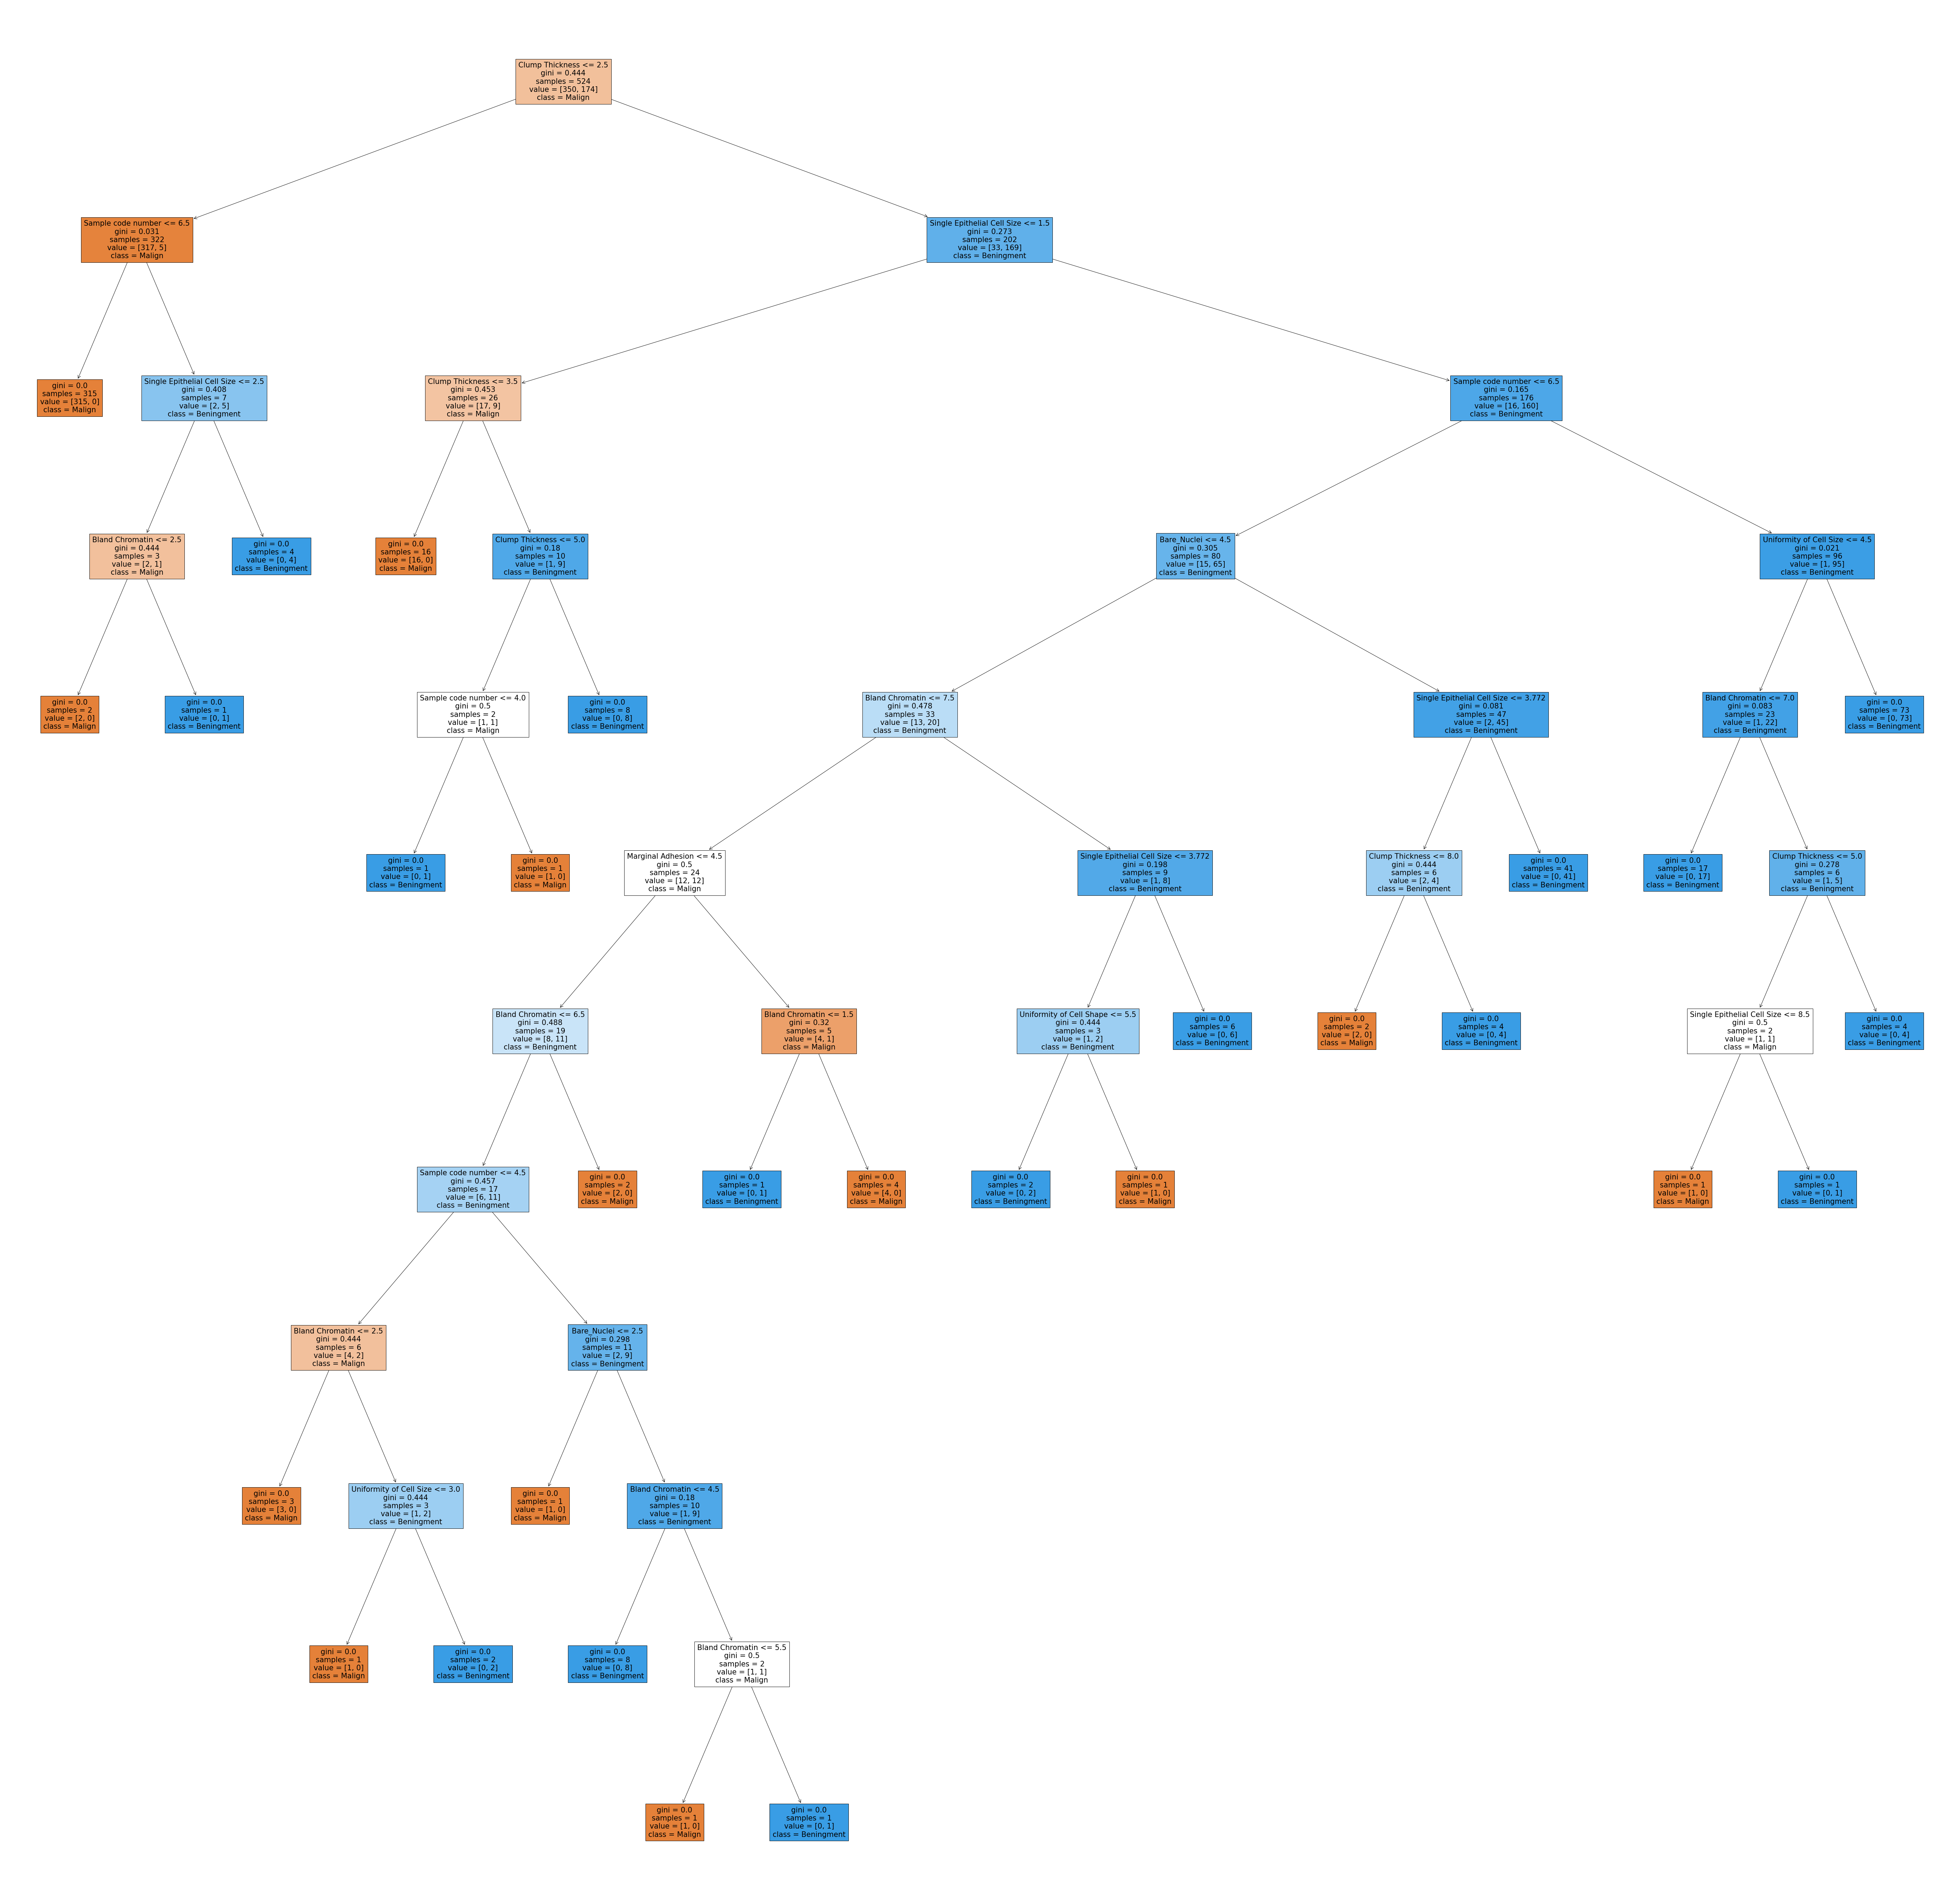

In [100]:
plt.figure(figsize=(100, 100))
features = df.columns
classes = ['Benign', 'Malignant']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [11]:
params = {'max_depth': [2,4,6,8],
         'min_samples_split': [2,3,4,5],
         'min_samples_leaf': [1,2,3]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(x_train,y_train)
model = gcv.best_estimator_
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_split=5)

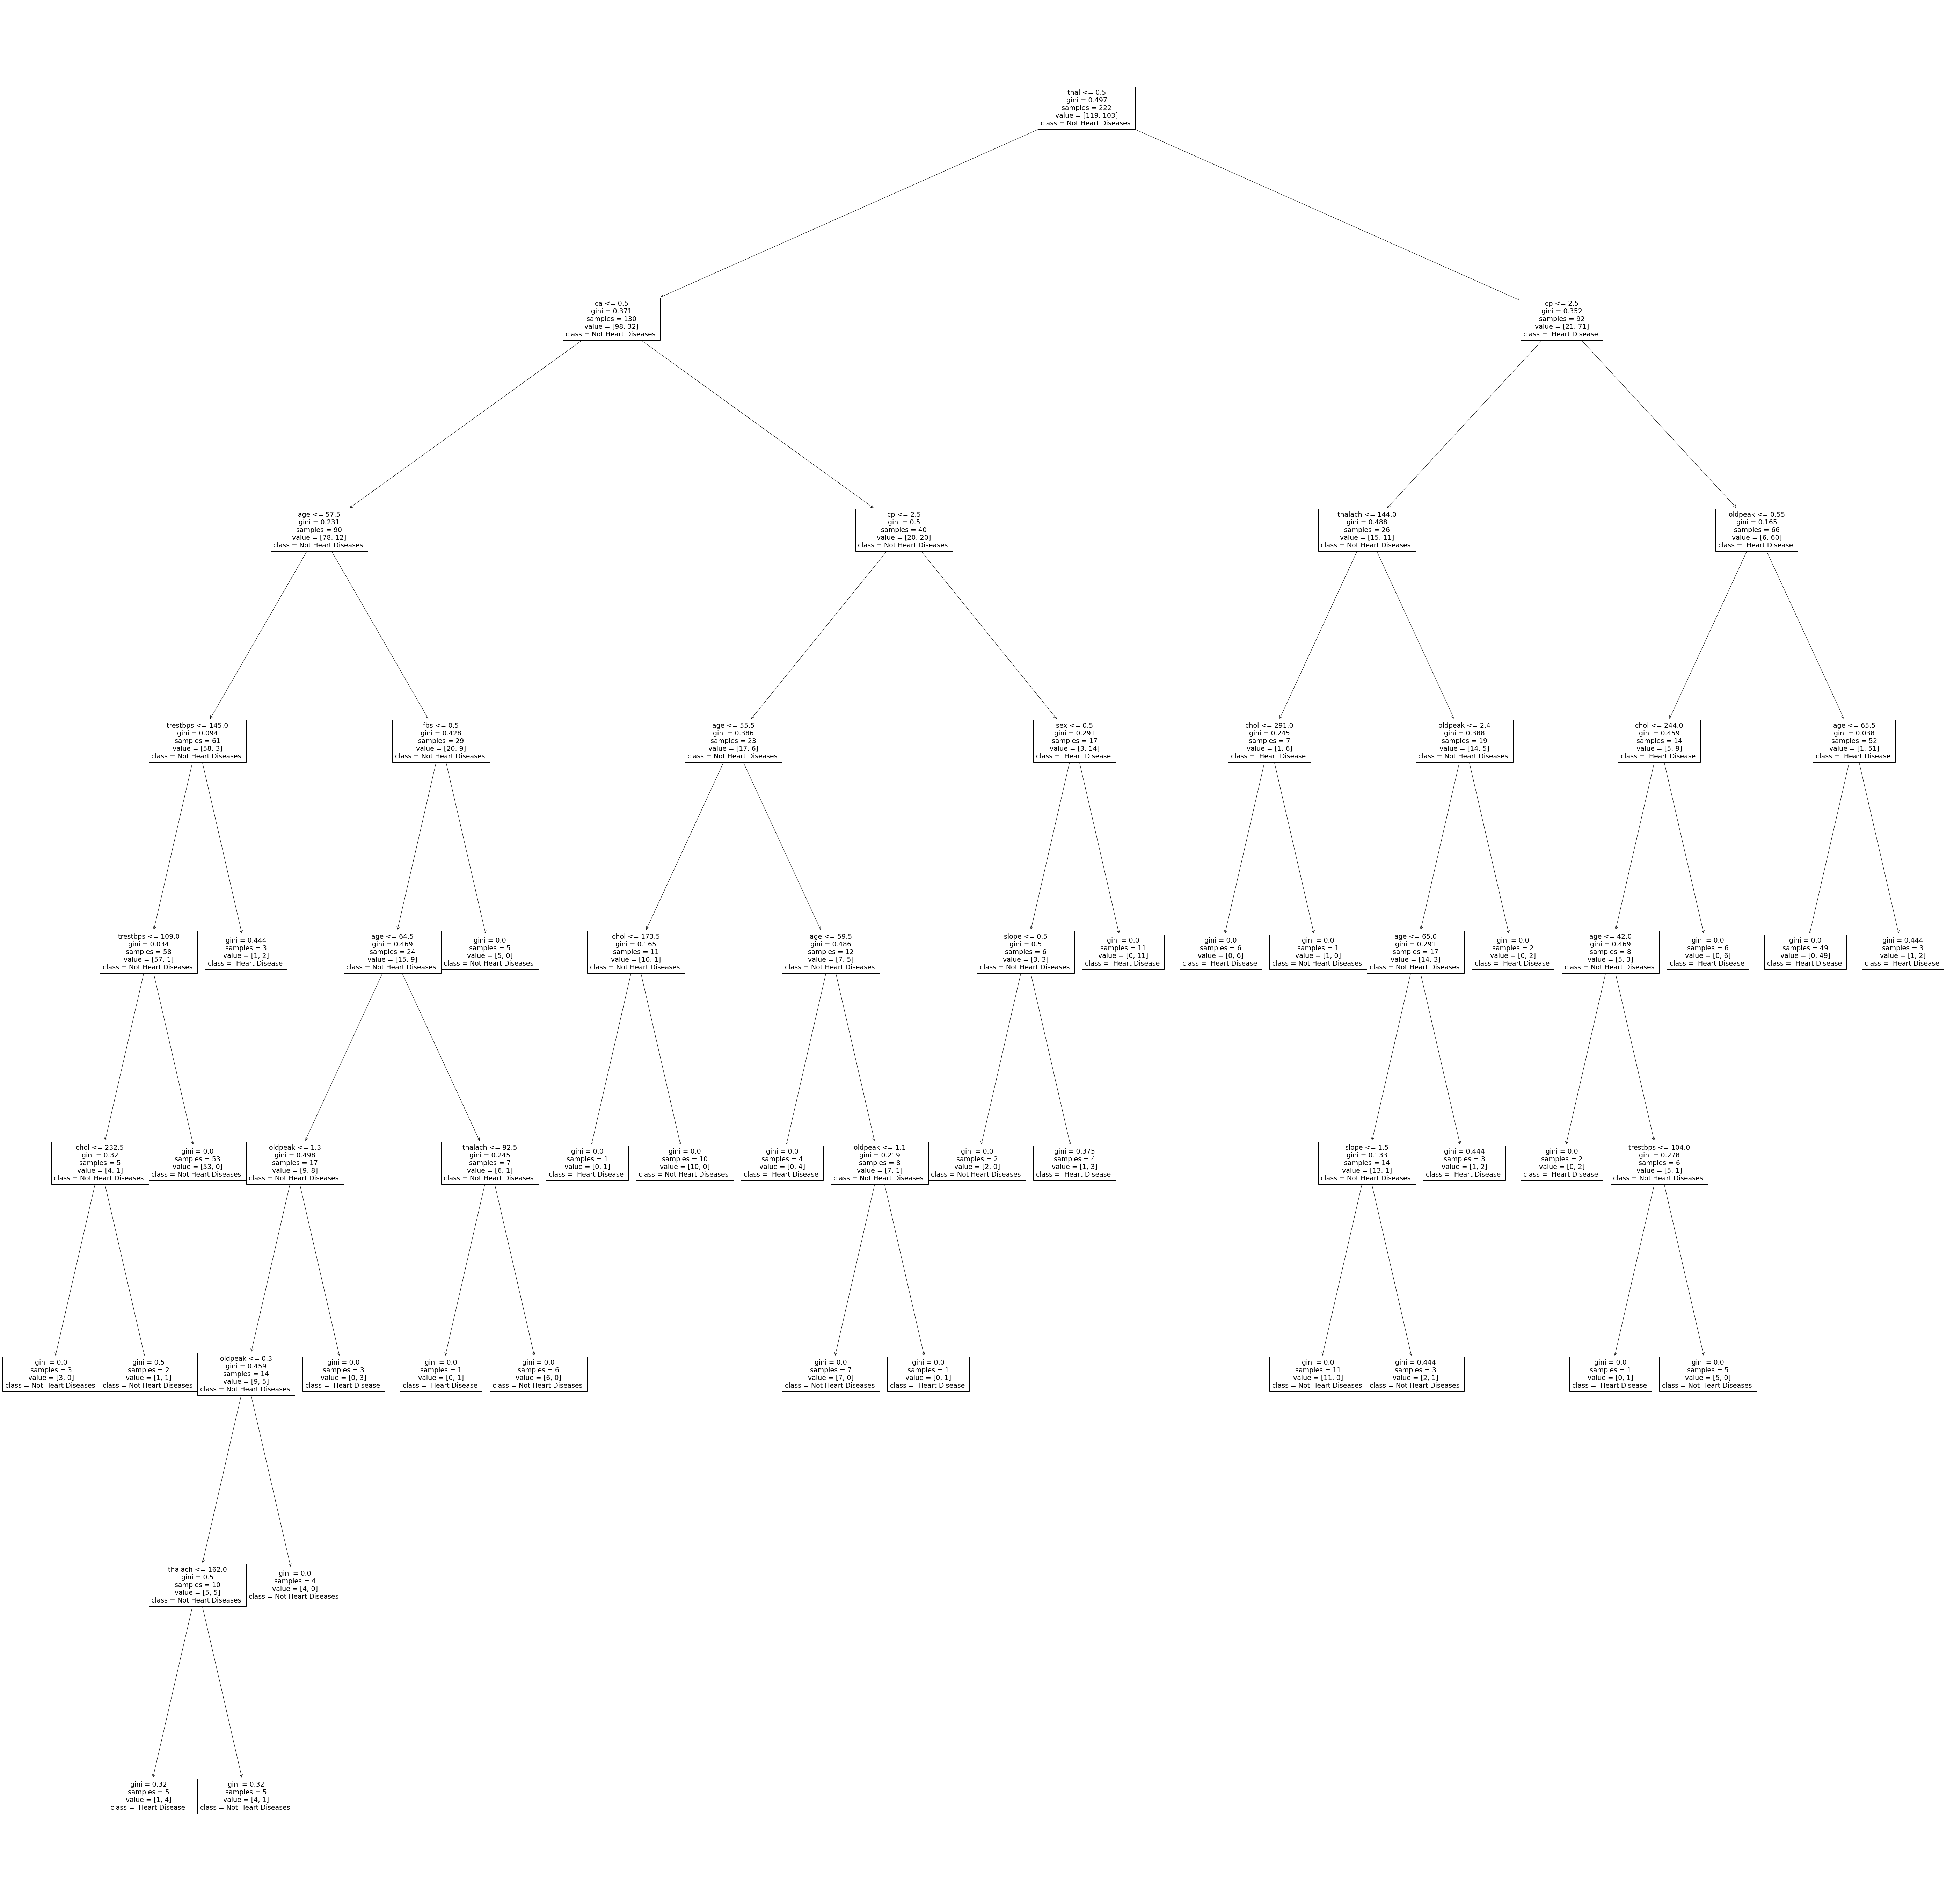

In [14]:
plt.figure(figsize=(100, 100))
features = df.columns
classes =  ['Not Heart Diseases ', ' Heart Disease ']
# classes = ['1','2','3','4','5','6', '7','8','9','10','11','12']
tree.plot_tree(model,feature_names=features,class_names=classes)
plt.show()